In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
tweets = pd.read_csv('russian-troll-tweets/tweets.csv')
users = pd.read_csv('russian-troll-tweets/users.csv')

In [4]:
tweets.head()

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id
0,1.868981e+09,ryanmaxwell_1,1.458672e+12,2016-03-22 18:31:42,NaN,NaN,NaN,#IslamKills Are you trying to say that there w...,7.123460e+17,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN
1,2.571870e+09,detroitdailynew,1.476133e+12,2016-10-10 20:57:00,0.0,False,0.0,"Clinton: Trump should’ve apologized more, atta...",7.855849e+17,"<a href=""http://twitterfeed.com"" rel=""nofollow...",[],"[""http://detne.ws/2e172jF""]",POSTED,[],NaN,NaN
2,1.710805e+09,cookncooks,1.487767e+12,2017-02-22 12:43:43,NaN,NaN,NaN,RT @ltapoll: Who was/is the best president of ...,8.343832e+17,NaN,[],[],POSTED,[],NaN,NaN
3,2.584153e+09,queenofthewo,1.482765e+12,2016-12-26 15:06:41,NaN,NaN,NaN,RT @jww372: I don't have to guess your religio...,8.134006e+17,NaN,"[""ChristmasAftermath""]",[],POSTED,[],NaN,NaN
4,1.768260e+09,mrclydepratt,1.501987e+12,2017-08-06 02:36:24,NaN,NaN,NaN,RT @Shareblue: Pence and his lawyers decided w...,8.940243e+17,NaN,[],[],POSTED,[],NaN,NaN


In [5]:
users.head()

,id,location,name,followers_count,statuses_count,time_zone,verified,lang,screen_name,description,created_at,favourites_count,friends_count,listed_count
0,18710816.0,near Utah Ave & Lighthouse an,Robby Delaware,304.0,11484.0,Pacific Time (US & Canada),False,en,RobbyDelaware,"I support the free movement of people, ideas a...",Wed Jan 07 04:38:02 +0000 2009,17.0,670.0,13.0
1,100345056.0,still ⬆️Block⤵️Corner⬇️street,#Ezekiel2517✨...,1053.0,31858.0,NaN,False,en,SCOTTGOHARD,CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...,Tue Dec 29 23:15:22 +0000 2009,2774.0,1055.0,35.0
2,247165706.0,"Chicago, IL",B E C K S T E R✨,650.0,6742.0,Mountain Time (US & Canada),False,en,Beckster319,Rebecca Lynn Hirschfeld Actress.Model.Writer.A...,Fri Feb 04 06:38:45 +0000 2011,7273.0,896.0,30.0
3,249538861.0,NaN,Chris Osborne,44.0,843.0,NaN,False,en,skatewake1994,NaN,Wed Feb 09 07:38:44 +0000 2011,227.0,154.0,1.0
4,449689677.0,NaN,Рамзан Кадыров,94773.0,10877.0,Moscow,False,ru,KadirovRussia,"Пародийный аккаунт. Озвучиваю то, что политика...",Thu Dec 29 11:31:09 +0000 2011,0.0,7.0,691.0


In [6]:
tweets['date_created'] = pd.to_datetime(tweets['created_str'])

# convert ids to object datatype
columns = ['user_id', 'tweet_id', 'retweeted_status_id', 
           'retweeted_status_id', 'in_reply_to_status_id']

for column in columns:
    tweets[column] = tweets[column].astype('object')

In [7]:
tweets.dtypes

user_id                          object
user_key                         object
created_at                      float64
created_str                      object
retweet_count                   float64
retweeted                        object
favorite_count                  float64
text                             object
tweet_id                         object
source                           object
hashtags                         object
expanded_urls                    object
posted                           object
mentions                         object
retweeted_status_id              object
in_reply_to_status_id            object
date_created             datetime64[ns]
dtype: object

In [8]:
#range of date of the tweets from the dataset
start_date = tweets['date_created'].min()
end_date = tweets['date_created'].max()

print(start_date, end_date)

2014-07-14 18:04:55 2017-09-26 09:05:32


In [9]:
# dates stores the just date component of the date_created column
tweets['dates_string'] = pd.to_datetime(tweets['date_created'].dt.date)

In [10]:
tweets.describe()

,created_at,retweet_count,favorite_count
count,2.034610e+05,58083.000000,58083.000000
mean,1.473183e+12,39.641909,35.495085
std,1.698586e+10,290.904628,270.201692
min,1.405361e+12,0.000000,0.000000
25%,1.471270e+12,0.000000,0.000000
50%,1.476888e+12,0.000000,0.000000
75%,1.483194e+12,0.000000,0.000000
max,1.506417e+12,20494.000000,26655.000000


In [11]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203482 entries, 0 to 203481
Data columns (total 18 columns):
user_id                  195417 non-null object
user_key                 203482 non-null object
created_at               203461 non-null float64
created_str              203461 non-null object
retweet_count            58083 non-null float64
retweeted                58083 non-null object
favorite_count           58083 non-null float64
text                     203461 non-null object
tweet_id                 201168 non-null object
source                   58084 non-null object
hashtags                 203482 non-null object
expanded_urls            203482 non-null object
posted                   203482 non-null object
mentions                 203482 non-null object
retweeted_status_id      39651 non-null object
in_reply_to_status_id    559 non-null object
date_created             203461 non-null datetime64[ns]
dates_string             203461 non-null datetime64[ns]
dtypes: dateti

### Now we want to filter just the useful columns from the dataset to explore correlations
Some columns don't appear to contain useful information that would relate to our goal of analysis

In [12]:
#I selected only some columns and assigned "tweet_id" to the index of the DataFrame
tweets_selected = tweets[['date_created', 'dates_string', 'hashtags' ,'retweet_count', 'text', 'tweet_id']]

In [13]:
tweets_selected.head()

,date_created,dates_string,hashtags,retweet_count,text,tweet_id
0,2016-03-22 18:31:42,2016-03-22,"[""IslamKills""]",NaN,#IslamKills Are you trying to say that there w...,7.12346e+17
1,2016-10-10 20:57:00,2016-10-10,[],0.0,"Clinton: Trump should’ve apologized more, atta...",7.85585e+17
2,2017-02-22 12:43:43,2017-02-22,[],NaN,RT @ltapoll: Who was/is the best president of ...,8.34383e+17
3,2016-12-26 15:06:41,2016-12-26,"[""ChristmasAftermath""]",NaN,RT @jww372: I don't have to guess your religio...,8.13401e+17
4,2017-08-06 02:36:24,2017-08-06,[],NaN,RT @Shareblue: Pence and his lawyers decided w...,8.94024e+17


In [14]:
tweets_selected = tweets_selected.dropna(subset=['text']) #Dropped rows with NaN text

This is Justin's method on plotting a histogram over the course of the year with the x-axis broken in fractions.
-  Not clear what unit is for the y-axis, I assume is just the distribution unit over the number of counts in the interval
-  Not very easy to compare and map the dates with major events though it allows you to zoom in on a period

In [15]:
#ploting histograms over the course of the year by converting the date into fractions after ther year

#source: https://stackoverflow.com/questions/6451655/python-how-to-convert-datetime-dates-to-decimal-years
import datetime
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length

tweets_selected['year_frac'] = tweets_selected['dates_string'].apply(year_fraction)
tweets_selected.head()

,date_created,dates_string,hashtags,retweet_count,text,tweet_id,year_frac
0,2016-03-22 18:31:42,2016-03-22,"[""IslamKills""]",NaN,#IslamKills Are you trying to say that there w...,7.12346e+17,2016.221311
1,2016-10-10 20:57:00,2016-10-10,[],0.0,"Clinton: Trump should’ve apologized more, atta...",7.85585e+17,2016.773224
2,2017-02-22 12:43:43,2017-02-22,[],NaN,RT @ltapoll: Who was/is the best president of ...,8.34383e+17,2017.142466
3,2016-12-26 15:06:41,2016-12-26,"[""ChristmasAftermath""]",NaN,RT @jww372: I don't have to guess your religio...,8.13401e+17,2016.983607
4,2017-08-06 02:36:24,2017-08-06,[],NaN,RT @Shareblue: Pence and his lawyers decided w...,8.94024e+17,2017.594521


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


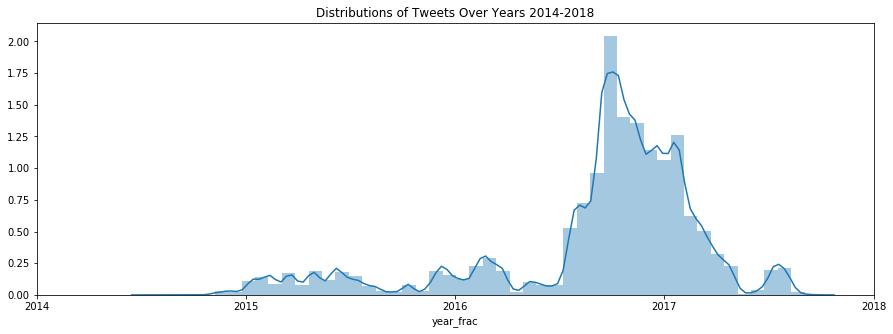

In [16]:
plt.figure(figsize=(15, 5))

sns.distplot(tweets_selected['year_frac'], label = 'year')
plt.title('Distributions of Tweets Over Years 2014-2018')
plt.xticks(np.arange(2014, 2019, 1));

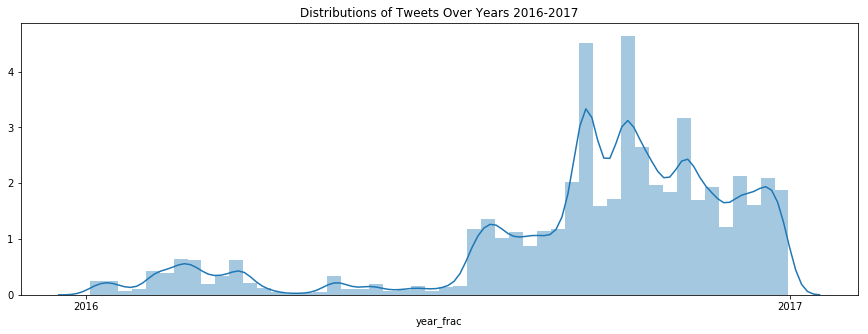

In [17]:
temp = tweets_selected[(tweets_selected['year_frac'] < 2017)]
tweets_election_period = temp[temp['year_frac'] > 2016]

plt.figure(figsize=(15, 5))

sns.distplot(tweets_election_period['year_frac'], label = 'election')
plt.title('Distributions of Tweets Over Years 2016-2017')
plt.xticks(np.arange(2016, 2018, 1));

Here's my more direct method, just plotting the number of tweets over periods of time.

In [18]:
trend = pd.DataFrame(tweets_selected['dates_string'].value_counts())
trend.columns = ['tweet_count']
trend.sort_index(ascending = True, inplace = True)
trend.head() #number of tweets as the column and date stamps as the index of the dataframe

,tweet_count
2014-07-14,1
2014-07-17,1
2014-07-20,2
2014-07-22,3
2014-07-23,1


Text(0, 0.5, 'Tweet Count')

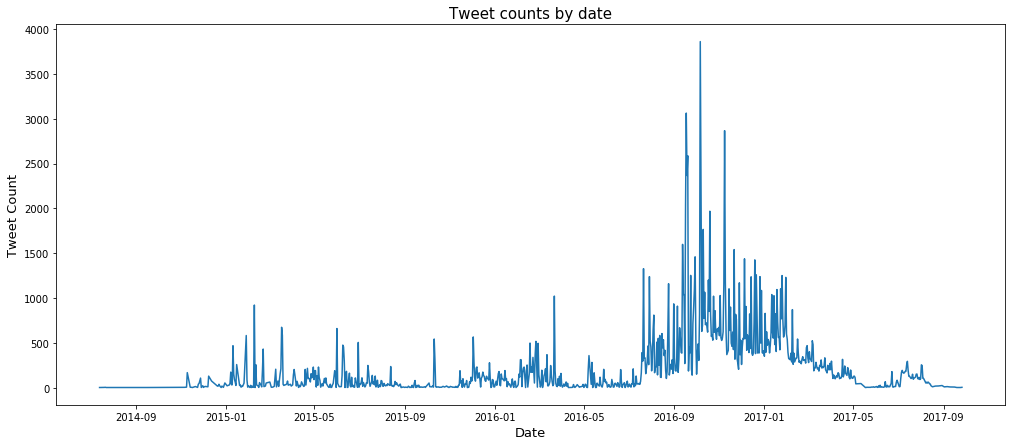

In [19]:
plt.figure(figsize=(17, 7))
sns.lineplot(x = 'index', y = 'tweet_count', data = trend.reset_index())
plt.title('Tweet counts by date', fontsize = 15)
plt.xlabel('Date', fontsize = 13)
plt.ylabel('Tweet Count', fontsize = 13)

-  We begin to see some major spikes stacks roughly during the period of 2016 election campaign
-  We want to ask the question: Is there a correlation between the russian tweets and the major US domestic events?
    -  If so, what events are correlated to the tweets, and analysis the significance of these events on the campaign.
-  We would want to run the sentiment analysis on the two election candidates, is there any difference in favoring from the tweets?
    -  If so, who does it favor? On what kind of sentiment? 
-  We want to cross validate our analysis by also looking at the important hashtags in the tweets (set of words, could be some of the major election buzz words, campaign propaganda, etc.
    -  Does it match our analysis using the sentiment analysis? 
    
Keep some background on news reports (Trump/Hillary connection with Russian oversea organizations to secretly aid their campaign, associations with leaking information in exchange for fundings...

Here's the link to the important 2016 election dates, Trump's campaign: 

https://www.reuters.com/article/us-usa-election-timeline-factbox/timeline-pivotal-moments-in-trumps-presidential-campaign-idUSKBN1341FJ

In [20]:
important_dates = ['2015-06-16', '2015-12-07', '2016-02-01',
                  '2016-03-01', '2016-03-03', '2016-03-11',
                  '2016-05-03', '2016-05-26', '2016-06-20', 
                  '2016-07-15', '2016-07-21', '2016-08-17',
                  '2016-09-01', '2016-10-07', '2016-11-08']

important_dates = pd.Series(pd.to_datetime(important_dates))

# add columns to identify important events, and mark a 0 or 1.
trend['Important Events'] = False
trend.loc[important_dates, 'Important Events'] = True
trend['values'] = 0
trend.loc[important_dates, 'values'] = 1 
trend.head()# so now that we have important dates with True label and numerical value of 1

,tweet_count,Important Events,values
2014-07-14,1,False,0
2014-07-17,1,False,0
2014-07-20,2,False,0
2014-07-22,3,False,0
2014-07-23,1,False,0


I borrowed this method from one of the Kernels on Kaggle, which does the job to overlay the important events over the gragh we just plotted above.

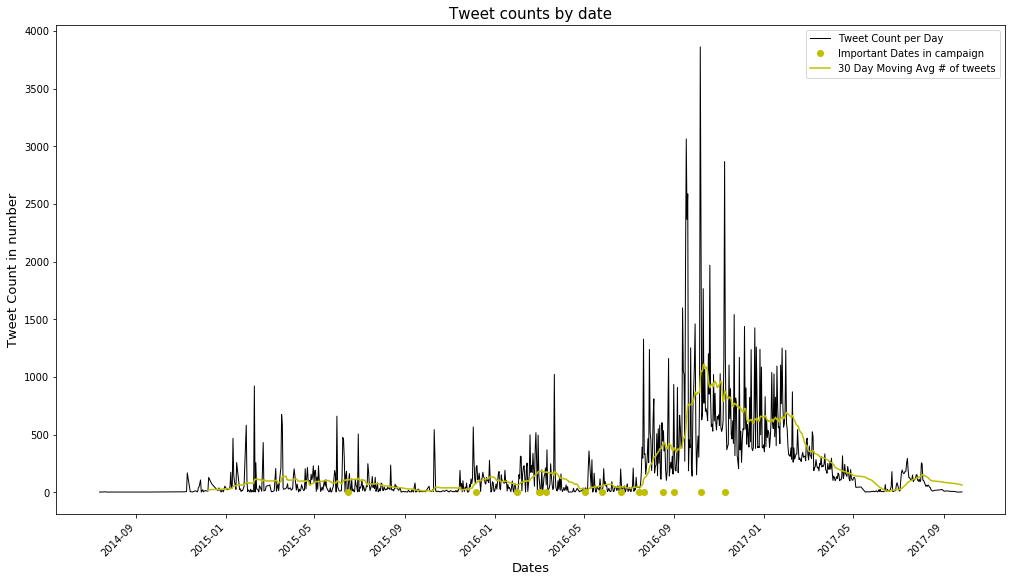

In [21]:
# plot the line chart for trend, a monthly average of tweet counts and add red dots to 
# mark important events.
# source: https://www.kaggle.com/chadalee/text-analytics-on-russian-troll-tweets-part-1

trend['tweet_count'].plot(linestyle = "-",
                                figsize = (17, 10), rot = 45, 
                                color = 'k',
                                label = 'Tweet Count per Day',
                               linewidth = 1)

# plot dots for where values in the tweet_trend df are 1
plt.plot(trend[trend['Important Events'] == True].index.values,
         trend.loc[trend['Important Events'] == True, 'values'],
         marker = 'o', 
         color = 'y',
         linestyle = 'none',
        label = 'Important Dates in campaign')

# Lets add a 30 day moving average on top to view the trend! Min_periods tells rolling() to
# use 10 points if 30 not available!
plt.plot(trend['tweet_count'].rolling(window = 30, min_periods = 30).mean(), 
         color = 'y', 
         label = '30 Day Moving Avg # of tweets')

plt.figure(1, figsize=(17, 7))
plt.title('Tweet counts by date', fontsize = 15)
plt.xlabel('Dates', fontsize = 13)
plt.ylabel('Tweet Count in number', fontsize = 13)
plt.legend(loc = 'best')

==================================================================== DO NOT CHANGE ANYTHING ABOVE

In [22]:
# Calculate the percentage change in tweet counts
trend['pct_change'] = trend['tweet_count'].pct_change()*100

# Visualize values only for the important dates. This Pct_Chg_tweets shows us the percentage
# change in tweets for the day of the event versus the previous day
trend.loc[trend['values'] == 1,['tweet_count', 'pct_change']]

,tweet_count,pct_change
2015-06-16,3,50.000000
2015-12-07,219,204.166667
2016-02-01,18,1700.000000
2016-03-01,143,-71.052632
2016-03-03,6,-92.105263
2016-03-11,64,-69.523810
2016-05-03,38,216.666667
2016-05-26,6,-50.000000
2016-06-20,201,1156.250000
2016-07-15,47,17.500000


Text(0, 0.5, 'Tweet Count Change')

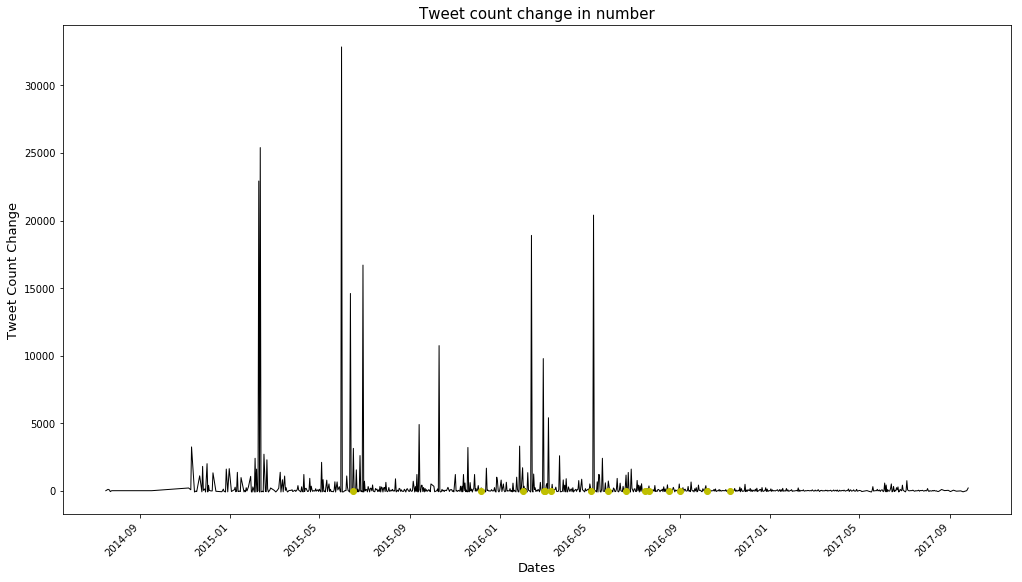

In [23]:
trend['pct_change'].plot(linestyle = "-", figsize = (17,10), rot = 45, color = 'k', linewidth = 1)

plt.plot(trend[trend['Important Events'] == True].index.values,
         trend.loc[trend['Important Events'] == True, 'values'],
         marker = 'o', 
         color = 'y',
         linestyle = 'none')

plt.title('Tweet count change in number', fontsize = 15)
plt.xlabel('Dates', fontsize = 13)
plt.ylabel('Tweet Count Change', fontsize = 13)

- Notice that many of the percentage changes are negative, some are drastically large than the others.
- Some major spikes in tweet count changes do match with the dates of major political campaign events, some doesnt, we realized that this is not really a very accurate way of correlating political events with the change in sensation in change of tweet counts.

## Text Analysis

1. Retweets begin with the keyword '**RT**'. These are followed by **@userkey**.
2. Hashtags begin with a **#** and are one continuous string with a space next to them.
3. Links begin with **https:// or http://** and can be present anywhere in the string.
4. There can be multiple links and hashtags in a tweet, but retweet identifier is just one.
5. User mentions begin with **'@'** and are a continuous word!

We want to extract only the tweet text strings themselves, here we define functions to strip the retweet symbols, links, hashtags and mentions from the text column of a particular tweet, then map it to the entire dataframe.

In [24]:
import re
def remove_retweet(tweet):
    text_only = []
    if len(re.findall("^RT.*?:(.*)", tweet)) > 0:
        text_only.append(re.findall("^RT.*?:(.*)", tweet)[0])
    else:
        text_only.append(tweet)
    return text_only[0]

def remove_links(tweet):
    text_only = []
    if len(re.findall("(https://[^\s]+)", tweet)) > 0:
        tweet = re.sub("(https://[^\s]+)", "", tweet)
    if len(re.findall("(http://[^\s]+)", tweet)) > 0:
        tweet = re.sub("(http://[^\s]+)", "", tweet)    
    text_only.append(tweet)
    return text_only[0]

def remove_hashtags(tweet):
    hashtags_only = []
    if len(re.findall("(#[^#\s]+)", tweet)) > 0:
        tweet = re.sub("(#[^#\s]+)", "", tweet) 
    hashtags_only.append(tweet)
    return hashtags_only[0]

def remove_extraneous(tweet):
    '''remove unnecessary characters from the beginning and the end'''
    tweet = tweet.rstrip()
    tweet = tweet.lstrip()
    tweet = tweet.rstrip(")")
    tweet = tweet.lstrip("(")
    tweet = re.sub("\.", "", tweet)
    return tweet

def extract_mentions(tweet):
    '''returns the user mentions'''
    mentions = []
    if len(re.findall('@[^\s@]+', tweet))>0:
        mentions.append(re.findall('@([^\s@]+)', tweet))
    else:
        mentions.append(["0"])
    return mentions[0]

def remove_mentions(tweet):
    mentions = []
    if len(re.findall('@[^\s@]+', tweet))>0:
        tweet = re.sub('@[^\s@]+', "" , tweet)
        mentions.append(tweet)
    else:
        mentions.append(tweet)
    return mentions[0]

In [25]:
#extract text from the cleaned tweets_select
text_only = tweets_selected['text'].map(remove_retweet)
text_no_links = text_only.map(remove_links)
text_no_hashtags = text_no_links.map(remove_hashtags)
text_clean = text_no_hashtags.map(remove_extraneous)
text_clean_final = text_clean.map(remove_mentions)

In [26]:
text_clean_final.head(10)

0    Are you trying to say that there were no terro...
1    Clinton: Trump should’ve apologized more, atta...
2    Who was/is the best president of the past 25 y...
3                 I don't have to guess your religion!
4    Pence and his lawyers decided which of his off...
5                                             me, too!
6    You’ll never guess who tweeted something false...
7    New post: WATCH: DIAMOND AND SILK Rip On John ...
8    3 Women Face Charges After Being Caught Steali...
9                       One of the ways to remind that
Name: text, dtype: object

Now we have all the tweets in texts, we can extract the hastags and see which is use the most often.

In [27]:
def extract_hashtags(tweet):
    hashtags_only = []
    if len(re.findall("(#[^#\s]+)", tweet)) > 0:
        hashtags_only.append(re.findall("(#[^#\s]+)", tweet))
    else:
        hashtags_only.append(["0"])
    return hashtags_only[0]


tweets_selected['tweet_hashtags'] = tweets_selected['text'].map(extract_hashtags)
tweets_selected.head(10)

,date_created,dates_string,hashtags,retweet_count,text,tweet_id,year_frac,tweet_hashtags
0,2016-03-22 18:31:42,2016-03-22,"[""IslamKills""]",NaN,#IslamKills Are you trying to say that there w...,7.12346e+17,2016.221311,[#IslamKills]
1,2016-10-10 20:57:00,2016-10-10,[],0.0,"Clinton: Trump should’ve apologized more, atta...",7.85585e+17,2016.773224,[0]
2,2017-02-22 12:43:43,2017-02-22,[],NaN,RT @ltapoll: Who was/is the best president of ...,8.34383e+17,2017.142466,[0]
3,2016-12-26 15:06:41,2016-12-26,"[""ChristmasAftermath""]",NaN,RT @jww372: I don't have to guess your religio...,8.13401e+17,2016.983607,[#ChristmasAftermath]
4,2017-08-06 02:36:24,2017-08-06,[],NaN,RT @Shareblue: Pence and his lawyers decided w...,8.94024e+17,2017.594521,[0]
5,2016-10-26 15:33:58,2016-10-26,[],NaN,"@ModicaGiunta me, too!",7.91302e+17,2016.816940,[0]
6,2017-03-07 18:11:44,2017-03-07,[],NaN,RT @MDBlanchfield: You’ll never guess who twee...,8.39177e+17,2017.178082,[0]
7,2016-12-30 12:49:30,2016-12-30,[],NaN,RT @100PercFEDUP: New post: WATCH: DIAMOND AND...,8.14816e+17,2016.994536,[0]
8,2016-10-30 01:48:19,2016-10-30,[],0.0,RT @AriaWilsonGOP: 3 Women Face Charges After ...,7.92544e+17,2016.827869,[0]
9,2016-03-16 19:07:39,2016-03-16,"[""Blacklivesmatter""]",NaN,One of the ways to remind that #BlackLivesMatt...,7.10181e+17,2016.204918,"[#BlackLivesMatter, #BlackPressDay]"


In [28]:
# create a list of all hashtags
all_hashtags = tweets_selected['tweet_hashtags'].tolist()

# But all the hastags are in nested lists, here I extracted them out.
cleaned_hashtags = []
for i in all_hashtags:
    for j in i:
            cleaned_hashtags.append(j)

# Convert cleaned_hashtags to a series and count the most frequent occuring
cleaned_hashtag_series = pd.Series(cleaned_hashtags)
hashtag_counts = cleaned_hashtag_series.value_counts()

In [29]:
from word_cloud.word_cloud_generator import WordCloud

ModuleNotFoundError: No module named 'word_cloud'

In [30]:
# Get hashtag terms from the series and convert to list
hashes = cleaned_hashtag_series.values
hashes = hashes.tolist()

# convert list to one string with all the words
hashes_words = " ".join(hashes)

# generate the wordcloud. the max_words argument controls the number of words on the cloud
#from wordcloud import WordCloud

wordcloud = WordCloud(width= 1600, height = 800, 
                      relative_scaling = 1.0, 
                      colormap = "Blues",
                     max_words = 100).generate(hashes_words)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

NameError: name 'WordCloud' is not defined

Text(0, 0.5, 'Hashtags')

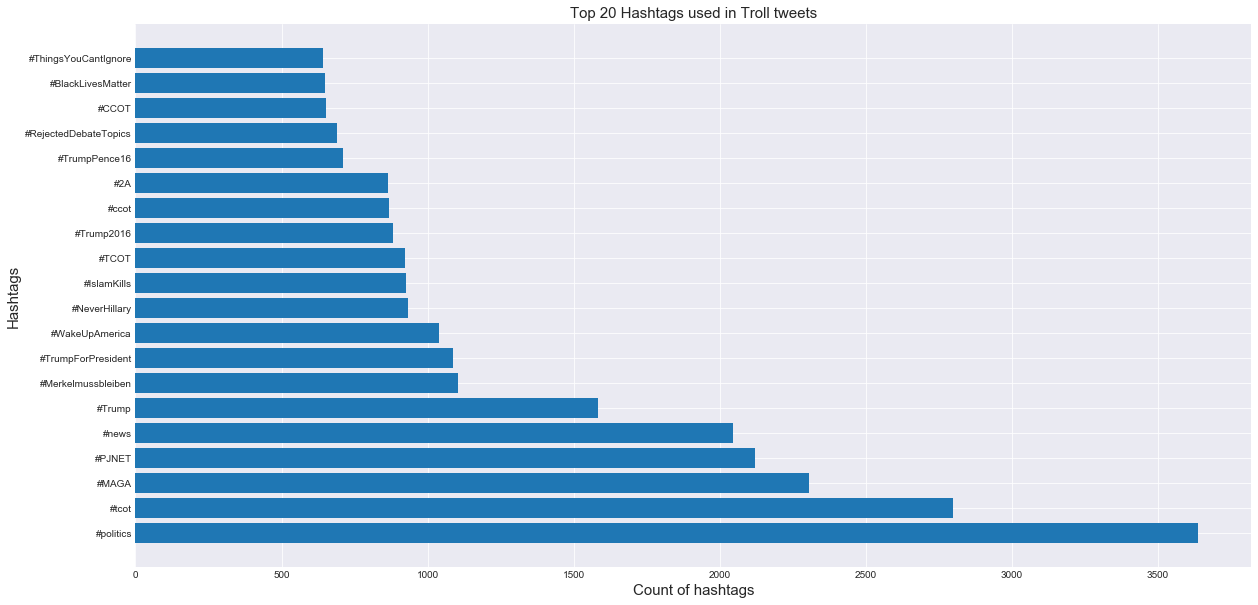

In [31]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (20, 10))
plt.barh(y = hashtag_counts[1:21].index.values, width = hashtag_counts[1:21])
plt.title("Top 20 Hashtags used in Troll tweets", fontsize = 15)
plt.xlabel('Count of hashtags', fontsize = 15)
plt.ylabel('Hashtags', fontsize = 15)

Looking at the top hashtags, we find that the most common hashtags in use - 

1. #**TCOT**
2. #**POLITICS**
3. #**PJNET**
4. #**MAGA**
5. #**Trump**

are all in support of the current president's campaign! Looks like the trolls were mostly supporting his candidacy!

- Among the top 20 used hashtags, we see that **#WAKEUPAMERICA, #P2, @HILLARY** are against the candidacy but these have been used far fewer times than others!

**#2A** - refers to the Second Amendment of the US constitution to keep and bear arms which the president supports!

### Were these hashtags used most just before the presidents campaign?
To analyze this, we will use the top 6 hashtags and a count of how many times these were used on the dates provided in the **dates_string** column.

- Let's first extract the dates and the hashtags used on those dates. We would then count each top hashtag in these and proceed.

In [32]:
# Create a dataframe with just the date and the hashtags in the tweet on that date
hashtag_date_df = tweets_selected[['dates_string', 'tweet_hashtags']]
hashtag_date_df = hashtag_date_df.reset_index(drop = True)

# extract a list of hashtags from the dataframe
all_hashtags = hashtag_date_df['tweet_hashtags'].tolist()

hashtag_date_df.head()

,dates_string,tweet_hashtags
0,2016-03-22,[#IslamKills]
1,2016-10-10,[0]
2,2017-02-22,[0]
3,2016-12-26,[#ChristmasAftermath]
4,2017-08-06,[0]


In [33]:
# For the top 10 hashtags, let's calculate how many times that appears against each date!
count_dict = {}
for i in hashtag_counts.index.values[1:11]:
    count_hash = []
    for j in all_hashtags:
        count_hash.append(j.count(i))
    count_dict[i] = count_hash
    
# create a dataframe from the hashtags
hashtag_count_df = pd.DataFrame(count_dict)

# concatenate this dataframe with the hashtag_count_df
hashtag_count_df = pd.concat([hashtag_date_df, hashtag_count_df], axis = 1)

In [34]:
hashtag_count_df.head()

,dates_string,tweet_hashtags,#politics,#tcot,#MAGA,#PJNET,#news,#Trump,#Merkelmussbleiben,#TrumpForPresident,#WakeUpAmerica,#NeverHillary
0,2016-03-22,[#IslamKills],0,0,0,0,0,0,0,0,0,0
1,2016-10-10,[0],0,0,0,0,0,0,0,0,0,0
2,2017-02-22,[0],0,0,0,0,0,0,0,0,0,0
3,2016-12-26,[#ChristmasAftermath],0,0,0,0,0,0,0,0,0,0
4,2017-08-06,[0],0,0,0,0,0,0,0,0,0,0


In [35]:
# change the created_str column into datetime format and extract just the date from it
hashtag_count_df['dates_string'] = pd.to_datetime(hashtag_count_df['dates_string'])

# set the index so as to plot the time series
hashtag_count_df.set_index('dates_string', inplace = True)

# get a monthly sum of the tweets for each of these hashtags
hashtag_count_df_pivot = hashtag_count_df.resample('M').sum()

# replace 0 with nan so that these can be removed in rows where they are all NaNs
hashtag_count_df_pivot.replace(0, np.nan, inplace = True)
hashtag_count_df_pivot.dropna(how = 'all', inplace = True, axis = 0)

# replace NaNs back by 0s so that we can plot
hashtag_count_df_pivot.replace(np.nan, 0, inplace = True)
hashtag_count_df_pivot

,#politics,#tcot,#MAGA,#PJNET,#news,#Trump,#Merkelmussbleiben,#TrumpForPresident,#WakeUpAmerica,#NeverHillary
dates_string,,,,,,,,,,
2015-02-28,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2015-03-31,1.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
2015-04-30,45.0,4.0,0.0,2.0,149.0,0.0,0.0,0.0,6.0,0.0
2015-05-31,41.0,30.0,0.0,64.0,163.0,0.0,0.0,0.0,53.0,0.0
2015-06-30,26.0,61.0,0.0,17.0,124.0,0.0,0.0,0.0,23.0,0.0
2015-07-31,59.0,13.0,0.0,3.0,307.0,2.0,0.0,0.0,7.0,0.0
2015-08-31,3.0,1.0,0.0,1.0,9.0,24.0,0.0,11.0,5.0,0.0
2015-09-30,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2015-10-31,20.0,34.0,0.0,11.0,1.0,6.0,0.0,0.0,11.0,0.0


Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['figure']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0.5, 0, 'Date')

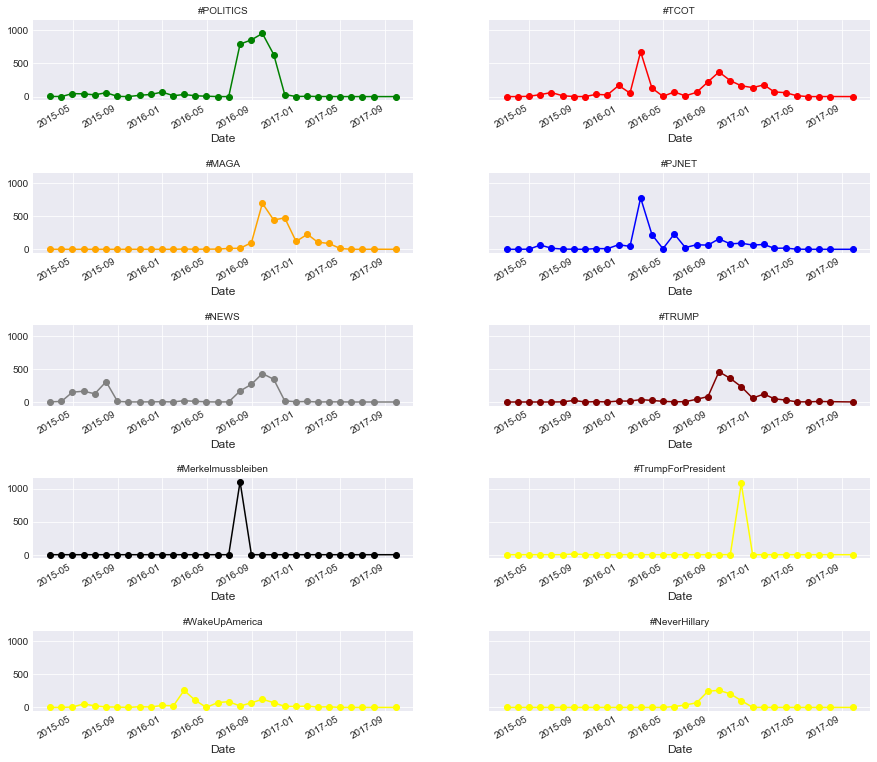

In [47]:
import matplotlib.pyplot as plt
%pylab inline

# create a 3 by 2 subplot to hold the trend of all hashtags
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = subplots(nrows = 5,
                                                       ncols = 2,
                                                       sharey = True,
                                                       figsize = (15,12))

plt.subplots_adjust(top = 1, hspace = 0.9)
hashtag_count_df_pivot['#politics'].plot(linestyle = "-", marker = "o", color = "green",ax = ax1)
ax1.set_title("#POLITICS", fontsize = 10)
ax1.set_xlabel('Date', fontsize = 12)

hashtag_count_df_pivot['#tcot'].plot(linestyle = "-", marker = "o", color = "red", ax = ax2)
ax2.set_title("#TCOT", fontsize = 10)
ax2.set_xlabel('Date', fontsize = 12)

hashtag_count_df_pivot['#MAGA'].plot(linestyle = "-", marker = "o", color = "orange", ax = ax3)
ax3.set_title("#MAGA", fontsize = 10)
ax3.set_xlabel('Date', fontsize = 12)

hashtag_count_df_pivot['#PJNET'].plot(linestyle = "-", marker = "o", color = "blue",ax = ax4)
ax4.set_title("#PJNET", fontsize = 10)
ax4.set_xlabel('Date', fontsize = 12)

hashtag_count_df_pivot['#news'].plot(linestyle = "-", marker = "o", color = "grey", ax = ax5)
ax5.set_title("#NEWS", fontsize = 10)
ax5.set_xlabel('Date', fontsize = 12)

hashtag_count_df_pivot['#Trump'].plot(linestyle = "-", marker = "o", color = "maroon", ax = ax6)
ax6.set_title("#TRUMP", fontsize = 10)
ax6.set_xlabel('Date', fontsize = 12)

hashtag_count_df_pivot['#Merkelmussbleiben'].plot(linestyle = "-", marker = "o", color = "black", ax = ax7)
ax7.set_title("#Merkelmussbleiben", fontsize = 10)
ax7.set_xlabel('Date', fontsize = 12)

hashtag_count_df_pivot['#TrumpForPresident'].plot(linestyle = "-", marker = "o", color = "yellow", ax = ax8)
ax8.set_title("#TrumpForPresident", fontsize = 10)
ax8.set_xlabel('Date', fontsize = 12)

hashtag_count_df_pivot['#WakeUpAmerica'].plot(linestyle = "-", marker = "o", color = "yellow", ax = ax9)
ax9.set_title("#WakeUpAmerica", fontsize = 10)
ax9.set_xlabel('Date', fontsize = 12)

hashtag_count_df_pivot['#NeverHillary'].plot(linestyle = "-", marker = "o", color = "yellow", ax = ax10)
ax10.set_title("#NeverHillary", fontsize = 10)
ax10.set_xlabel('Date', fontsize = 12)

- We see that most of these hashtags picked up in the year 2016 near March or later in July, close to the elections! This is also the time when alleged interference by Russian trolls started.
- We see the largest peak in the **#politics**. Maybe tweeting about politics got these trolls the largest following.
- Some campaign buzz words like **#NeverHillary**, **#WakeUpAmerica**, **#TrumpForPresident**, and **#MAGA** rise in almost a overlapping period of time in the pre-election months


============================================ Sentiment Analysis =====================================================

In [2]:
import pandas as pd
sent_read = pd.read_csv("vader_lexicon.txt", delimiter="\t", header=None)[[0,1]].rename(columns={0: "word", 1:"polarity"})
sent = sent_read.set_index("word")
sent.head()

FileNotFoundError: File b'vader_lexicon.txt' does not exist

In [ ]:
tweets["text"] = tweets["text"].str.lower()
tweets = tweets.sort_values('user_id').dropna(subset=['user_id']).set_index('user_id')
tweets.dropna(axis=0, how='all')
tweets.head()

In [ ]:
# Save your regex in punct_re
#punct_re = r'[^\w \xC0-\xFF]'
punct_re = r'[^(\w\s)]'
tweets['no_punc'] = tweets['text'].str.replace(punct_re, ' ')
tweets.head()

In [ ]:
tidy_format = pd.DataFrame(tweets['no_punc'].str.split(expand = True).stack()).reset_index(level=1, 
            col_level=1, col_fill='word')
tidy_format.columns = ['num', 'word']
tidy_format.head()

In [ ]:
#Added a polarity column to the table, which calculates the sum of the sentiment polarity of each word in each tweet.
tweets['polarity'] = pd.merge(tidy_format, sent, right_index=True, left_on='word', how='outer')['polarity'].groupby('user_id').agg(sum)
tweets.dropna(subset=['polarity'])
tweets.head()

In [ ]:
print('Most negative tweets:')
for t in tweets.sort_values('polarity').head()['text']:
    print('\n  ', t)

In [ ]:
print('Most positive tweets:')
for t in tweets.sort_values('polarity', ascending=False).head()['text']:
    print('\n  ', t)